## Local Binary Pattern Example 1
### CS4243, Amir, 2022

In [1]:
import math as m
import cv2
import numpy as np
import random as rnd
from matplotlib import pyplot as plt

In [2]:
# function to compute the power of an image, ither RGb or graylevel
def am_power2(a):
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    else:
        sz = dim1[0] * dim1[1] * dim1[2]
    pa = np.sum( np.double(a)**2 )
    pa = pa / sz
    return pa 

In [3]:
img = cv2.imread('..\\IMG_8636.JPG',0)


In [4]:
M = img.shape
lbpres = np.zeros(M)
M

(2592, 3888)

In [5]:
def lbpmask(a,x,y):
    k = [1,2,4, 128,0,8, 64,32,16]
    kk=0
    ans=0
    for i in range(x-1,x+2):
        for j in range(y-1,y+2):
            ans += (a[i,j] >= a[x,y])*k[kk]
            kk += 1
    
    return ans

In [6]:
for i in range(1,M[0]-1):
    for j in range(1,M[1]-1):
        lbpres[i,j] = lbpmask(img,i,j)
                

In [7]:
lbpres

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 243., 225., ..., 124., 122.,   0.],
       [  0.,  57., 224., ..., 252.,  64.,   0.],
       ...,
       [  0., 255., 255., ..., 255., 255.,   0.],
       [  0., 255., 255., ..., 241., 255.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [8]:
am_power2(lbpres)

36717.29916758751

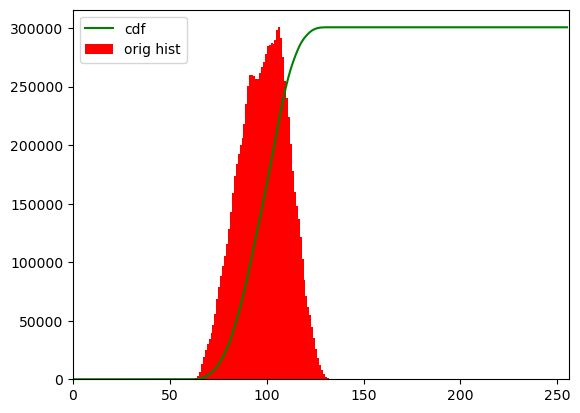

In [9]:
# original image histogram 
#
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','orig hist'), loc = 'upper left')
plt.show()

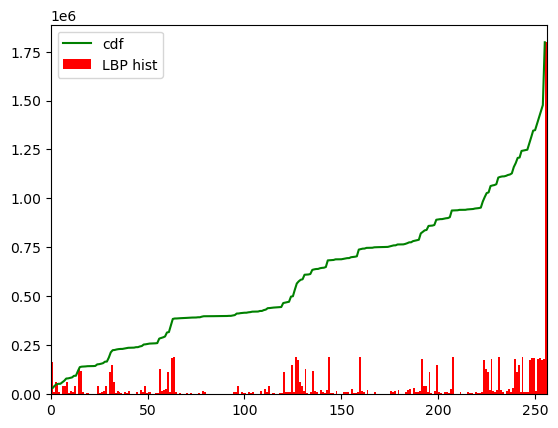

In [10]:
# LBP histogram 
#
hist,bins = np.histogram(lbpres.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(lbpres.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','LBP hist'), loc = 'upper left')
plt.show()

In [11]:
# showing the result
cv2.imshow("The Image" , img)
cv2.imshow("LBP Matrix" , np.uint8(lbpres) )

In [12]:
# return: lbpres, hist, power

In [13]:
cv2.waitKey(0)
cv2.destroyAllWindows() 